![image](how.png)

**"Should I Stay or Should i Go (from the Hospital)"**

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn import linear_model
# la otra forma, pero lo mismo: from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [23]:
df = pd.read_csv("/Users/elsa/Desktop/Bootcamp The Bridge/The_Bridge/Ds_Bootcamp_Elsa/Ejercicios/competicion_kaggle/train_set.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   0       100000 non-null  int64  
 1   1       100000 non-null  int64  
 2   2       100000 non-null  object 
 3   3       100000 non-null  int64  
 4   4       100000 non-null  object 
 5   5       100000 non-null  int64  
 6   6       100000 non-null  object 
 7   7       100000 non-null  object 
 8   8       100000 non-null  object 
 9   9       99967 non-null   float64
 10  10      100000 non-null  int64  
 11  11      98517 non-null   float64
 12  12      100000 non-null  object 
 13  13      100000 non-null  object 
 14  14      100000 non-null  int64  
 15  15      100000 non-null  object 
 16  16      100000 non-null  float64
 17  17      100000 non-null  object 
dtypes: float64(3), int64(6), object(9)
memory usage: 13.7+ MB


In [5]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,161528,6,a,6,X,2,gynecology,R,F,4.0,45810,2.0,Urgent,Moderate,2,21-30,2817.0,0-10
1,159472,23,a,6,X,4,gynecology,Q,F,2.0,128565,15.0,Trauma,Moderate,4,51-60,4498.0,21-30
2,309765,2,c,5,Z,2,anesthesia,S,F,3.0,46565,5.0,Urgent,Moderate,2,71-80,4573.0,11-20
3,279614,32,f,9,Y,3,gynecology,S,B,4.0,124546,6.0,Emergency,Moderate,4,11-20,7202.0,51-60
4,147791,14,a,1,X,3,gynecology,S,E,2.0,22729,8.0,Urgent,Moderate,2,51-60,3398.0,51-60


In [24]:
# PROBLEMA DE CLASIFICACIÓN
df["17"].value_counts()

21-30                 27452
11-20                 24476
31-40                 17311
51-60                 10984
0-10                   7427
41-50                  3668
71-80                  3297
More than 100 Days     2150
81-90                  1470
91-100                  908
61-70                   857
Name: 17, dtype: int64

In [14]:
# esto es necesario para evitar futuros errores pero si quitaráis las columnas con Nan no haría falta
# Nan no vale pero 0 sí
#df = df.dropna()
# esto quita filas y por tanto no se lo podremos aplicar al dataset de predicción

In [25]:
# quitad la primera columna porque corresponde con el case_id y por tanto no le servirá al modelo para aprender...
# quitar otras columnas es decisión vuestra como futuros data scientists 
df.drop("0",1,inplace = True)
# Convierto todos los nan en 0
df.fillna(0, inplace=True)

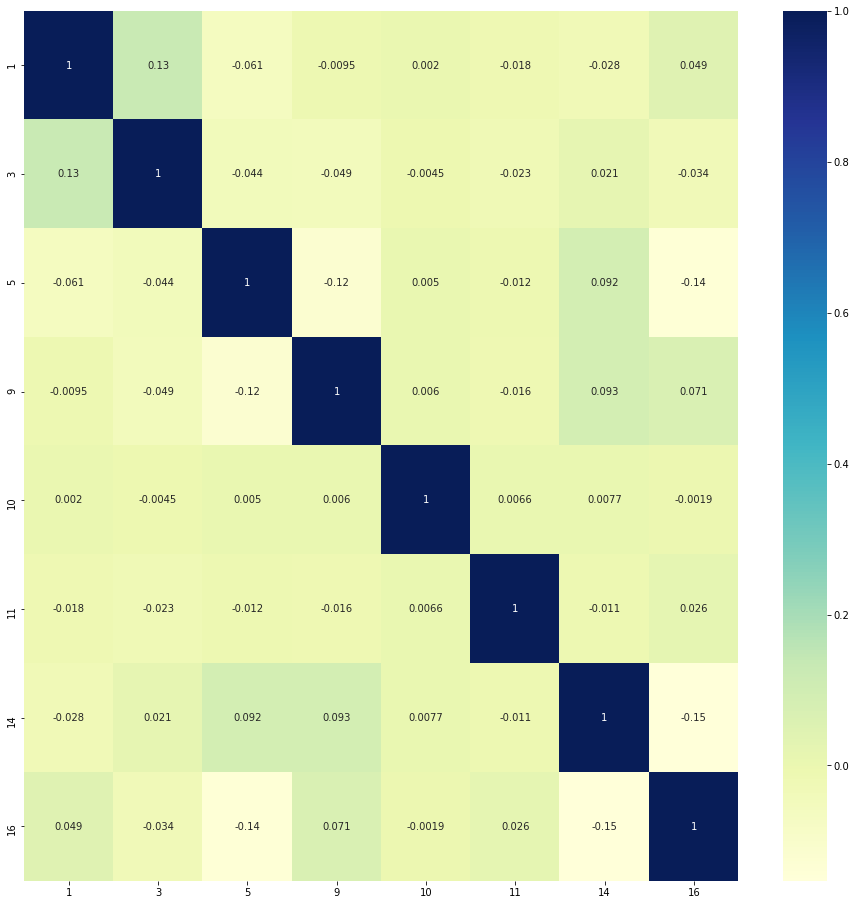

In [26]:
# Dibujo la matriz de correlación
plt.figure(figsize=(16, 16))
sns.heatmap(df.corr(), annot = True, cmap="YlGnBu")

#### 1. Definir X e y

In [27]:
# Obto sólo por las columnas de correlación numéricas aunque sea baja dicha correlación
X = np.array(df[["1","5","9","16"]])
y = np.array(df['17'])
X.shape

(100000, 4)

In [18]:
y.shape

(100000,)

#### 2. Dividir X_train, X_test, y_train, y_test

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [29]:
X_train

array([[2.500e+01, 3.000e+00, 3.000e+00, 4.370e+03],
       [2.600e+01, 4.000e+00, 4.000e+00, 7.965e+03],
       [1.400e+01, 3.000e+00, 3.000e+00, 3.997e+03],
       ...,
       [1.700e+01, 2.000e+00, 3.000e+00, 4.902e+03],
       [1.500e+01, 4.000e+00, 3.000e+00, 4.244e+03],
       [1.400e+01, 4.000e+00, 2.000e+00, 4.967e+03]])

#### 3. Asignar el modelo (vacío) a una variable
Aquí meteríais los parámetros

In [30]:
model = linear_model.LogisticRegression()
# la otra forma, pero lo mismo: model = LogisticRegression()

#### 4. Entrenar el modelo con X_train, y_train

In [31]:
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

#### 5. Predecir con el modelo ya entrenado con X_test/to_pred

In [32]:
predictions = model.predict(X_test)
print(predictions)

['11-20' '21-30' '21-30' ... '21-30' '21-30' '21-30']


#### 6. Sacar métricas, valorar el modelo 

In [33]:
model.score(X_test,y_test)

0.2876

## Una vez listo el modelo, toca predecir con el dataset de predicción 

In [34]:
to_pred = pd.read_csv("/Users/elsa/Desktop/Bootcamp The Bridge/The_Bridge/Ds_Bootcamp_Elsa/Ejercicios/competicion_kaggle/test_set.csv")

In [35]:
# la primera columna es id_case, deberéis quitarla para hacer la predicción si la habéis quitado para entrenar
# pero guardarla para incluirla en la submission

# IMPORTANTE: APLICAR LO MISMO A ESTOS DATOS QUE HAYÁIS APLICADO A LOS DATOS DE ENTRENAMIENTO
# SI EL ARRAY CON EL QUE HICISTEIS .fit() ERA DE 4 COLUMNAS, PARA .predict() DEBEN SER LAS MISMAS
# SI AL ARRAY CON EL QUE HICISTEIS .fit() LO NORMALIZASTEIS, PARA .predict() DEBÉIS NORMALIZARLO
# TODO IGUAL SALVO BORRAR FILAS, EL NÚMERO DE ROWS SE DEBE MANTENER EN ESTE SET, PUES LA PREDICCIÓN DEBE TENER 133744 FILAS
# SI O SI

to_pred

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,314114,19,a,7,Y,4,gynecology,S,C,2.0,59278,8.0,Emergency,Minor,2,41-50,4778.0
1,208989,15,c,5,Z,3,gynecology,S,F,2.0,102253,15.0,Trauma,Moderate,3,31-40,5734.0
2,305872,17,e,1,X,4,gynecology,R,E,4.0,5828,4.0,Emergency,Minor,3,71-80,5064.0
3,266099,3,c,3,Z,4,TB & Chest disease,R,A,2.0,56642,9.0,Urgent,Extreme,4,31-40,3254.0
4,13228,6,a,6,X,4,gynecology,R,F,1.0,116266,8.0,Emergency,Minor,3,21-30,4639.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133739,318155,18,d,13,Y,6,anesthesia,Q,B,3.0,123269,25.0,Urgent,Minor,4,51-60,5089.0
133740,144850,27,a,7,Y,2,gynecology,S,C,2.0,1293,8.0,Emergency,Moderate,3,61-70,6713.0
133741,180676,16,c,3,Z,3,gynecology,R,A,3.0,112921,5.0,Trauma,Minor,3,31-40,5326.0
133742,39933,28,b,11,X,4,gynecology,R,F,2.0,585,2.0,Trauma,Extreme,2,31-40,7072.0


In [36]:
# para evitar este error ValueError: Input contains NaN, infinity or a value too large for dtype('float64').
to_pred = to_pred.fillna(0)

In [38]:
predictions_submit = model.predict(to_pred[["1","5","9","16"]])
predictions_submit

array(['21-30', '21-30', '21-30', ..., '21-30', '21-30', '21-30'],
      dtype=object)

In [39]:
submission = pd.DataFrame({"id": to_pred["0"], "days": predictions_submit})
submission

,id,days
0,314114,21-30
1,208989,21-30
2,305872,21-30
3,266099,21-30
4,13228,21-30
...,...,...
133739,318155,21-30
133740,144850,21-30
133741,180676,21-30
133742,39933,21-30


In [40]:
sample = pd.read_csv("/Users/elsa/Desktop/Bootcamp The Bridge/The_Bridge/Ds_Bootcamp_Elsa/Ejercicios/competicion_kaggle/sample_submission.csv")

In [41]:
sample.shape

(133744, 2)

In [44]:
if submission.shape == sample.shape:
    if submission.columns.all() == sample.columns.all():
        if submission.id.all() == sample.id.all():
            print("you're ready to submit!")
            submission.to_csv("to_submitC_logistic0.2876.csv", index = False)
            # ¡¡¡¡¡¡¡ADD INDEX = FALSE!!!!!!!!!

you're ready to submit!
